# 逻辑回归模型

来源：https://blog.csdn.net/qq_41251963/article/details/103943766

## 梯度下降求解逻辑回归

建立一个逻辑回归模型来预测一个学生是否被大学录取。假设你是一个大学管理员，你想根据两次考试的结果
来决定每个申请人的录取机会，你有以前申请人的历史数据，你可以用它作为逻辑回归的训练集。对于每一个培训
例子，有两个考试的申请人的分数和录取决定，为了做到这一点，建立一个分类模型，根据考试成绩估计入学概率。 

## 数据集读取

本案例所用数据位于 ./data/LogiReg_data.txt

数据理解：
前两列记录两场考试的成绩，最后一列记录考试的通过情况

       Exam1      Exam2  Admitted
0  34.623660  78.024693         0
1  30.286711  43.894998         0
2  35.847409  72.902198         0
3  60.182599  86.308552         1
4  79.032736  75.344376         1
(100, 3)


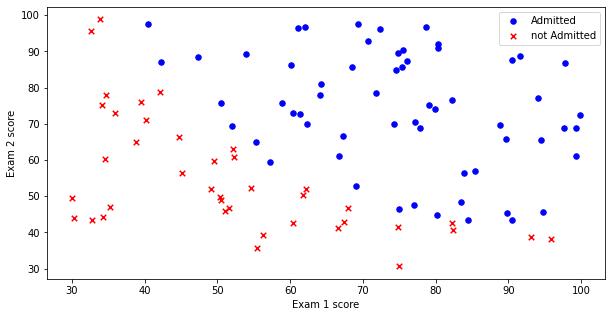

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
path='data'+os.sep+'Logireg_data.txt'
pdData=pd.read_csv(path,header=None,names=['Exam1','Exam2','Admitted'])
pdData.head()
print(pdData.head())
print(pdData.shape)
positive=pdData[pdData['Admitted']==1]#定义正
nagative=pdData[pdData['Admitted']==0]#定义负
fig,ax=plt.subplots(figsize=(10,5))
ax.scatter(positive['Exam1'],positive['Exam2'],s=30,c='b',marker='o',label='Admitted')
ax.scatter(nagative['Exam1'],nagative['Exam2'],s=30,c='r',marker='x',label='not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 score')
ax.set_ylabel('Exam 2 score')
plt.show()#画图

## The logistic regression

目标：建立分类器（求解出三个参数Θ0，Θ1，Θ2）

设定阈值，根据阈值判断录取结果

## 要完成的模块：

* sigmoid:映射到概率的函数
* model：返回预测结果值
* cost：根据参数计算损失
* gradient：计算每个参数的梯度方向
* descent：进行参数更新
* accuracy：计算精度

## 定义sigmoid函数

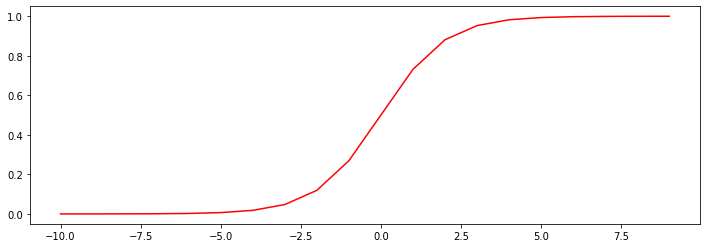

In [2]:
##实现算法 the logistics regression 目标建立一个分类器 设置阈值来判断录取结果
##sigmoid 函数
def sigmoid(z):
    return 1/(1+np.exp(-z))
#画图
nums=np.arange(-10,10,step=1)
fig,ax=plt.subplots(figsize=(12,4))
ax.plot(nums,sigmoid(nums),'r')#画图定义
plt.show()

## 定义模型

In [6]:
#按照理论实现预测函数
def model(X,theta):
    return sigmoid(np.dot(X,theta.T))
 
pdData.insert(0,'ones',1)#插入一列
# orig_data=pdData.as_matrix() # 老版本使用 .as_matrix()
orig_data=pdData.values # 新版本使用 .values
cols=orig_data.shape[1]
X=orig_data[:,0:cols-1]
y=orig_data[:,cols-1:cols]
theta=np.zeros([1,3])
print(X[:5])
print(X.shape,y.shape,theta.shape)

[[ 1.         34.62365962 78.02469282]
 [ 1.         30.28671077 43.89499752]
 [ 1.         35.84740877 72.90219803]
 [ 1.         60.18259939 86.3085521 ]
 [ 1.         79.03273605 75.34437644]]
(100, 3) (100, 1) (1, 3)


## 定义损失函数

对数损失 (Log-likelihood Loss) / 逻辑斯蒂回归损失 (Logistic Loss)

$L(Y, P(Y|X)) = -\log P(Y|X) = -\frac{1}{N} \sum_{i=1}^{N} \sum_{n=j}^{M} y_{ij} \log (p_{ij})$

当只有两类时，对数损失函数简化为

$ -\frac{1}{N} \sum_{i=1}^{N} (y_i \log p_i + (1-y_i) \log (1-p_i))$

In [7]:
##损失函数
def cost(X,y,theta):
    left=np.multiply(-y,np.log(model(X,theta)))
    right=np.multiply(1-y,np.log(1-model(X,theta)))
    return np.sum(left-right)/(len(X))
print(cost(X,y,theta))

0.6931471805599453


## 计算梯度

$\frac{\partial{J}}{\partial{\theta_j}} = -\frac{1}{M} \sum_{i=1}^{n} (y_i-h_\theta (x_i)) x_{ij}$

In [9]:
#计算梯度
def gradient(X, y, theta):
    grad = np.zeros(theta.shape)
    error = (model(X, theta) - y).ravel()
    for j in range(len(theta.ravel())):  # for each parmeter
        term = np.multiply(error, X[:, j])
        grad[0, j] = np.sum(term) / len(X)
 
    return grad
##比较3种不同梯度下降方法
STOP_ITER=0  # 根据迭代次数停止
STOP_COST=1  # 根据迭代损失停止
STOP_GRAD=2  # 根据梯度停止
 
def stopCriterion(type,value,threshold):
    if type==STOP_ITER: return value>threshold
    elif type==STOP_COST: return abs(value[-1]-value[-2])<threshold
    elif type==STOP_GRAD: return np.linalg.norm(value)<threshold
 
import numpy.random
#打乱数据洗牌
def shuffledata(data):
    np.random.shuffle(data)
    cols=data.shape[1]
    X=data[:,0:cols-1]
    y=data[:,cols-1:]
    return X,y

In [10]:
import time
 
def descent(data, theta, batchSize, stopType, thresh, alpha):
    # 梯度下降求解
 
    init_time = time.time()
    i = 0  # 迭代次数
    k = 0  # batch
    X, y = shuffledata(data)
    grad = np.zeros(theta.shape)  # 计算的梯度
    costs = [cost(X, y, theta)]  # 损失值
 
    while True:
        grad = gradient(X[k:k + batchSize], y[k:k + batchSize], theta)
        k += batchSize  # 取batch数量个数据
        if k >= n:
            k = 0
            X, y = shuffledata(data)  # 重新洗牌
        theta = theta - alpha * grad  # 参数更新
        costs.append(cost(X, y, theta))  # 计算新的损失
        i += 1
 
        if stopType == STOP_ITER:
            value = i
        elif stopType == STOP_COST:
            value = costs
        elif stopType == STOP_GRAD:
            value = grad
        if stopCriterion(stopType, value, thresh): break
 
    return theta, i - 1, costs, grad, time.time() - init_time
#选择梯度下降
def runExpe(data, theta, batchSize, stopType, thresh, alpha):
    #import pdb; pdb.set_trace();
    theta, iter, costs, grad, dur = descent(data, theta, batchSize, stopType, thresh, alpha)
    name = "Original" if (data[:,1]>2).sum() > 1 else "Scaled"
    name += " data - learning rate: {} - ".format(alpha)
    if batchSize==n: strDescType = "Gradient"
    elif batchSize==1:  strDescType = "Stochastic"
    else: strDescType = "Mini-batch ({})".format(batchSize)
    name += strDescType + " descent - Stop: "
    if stopType == STOP_ITER: strStop = "{} iterations".format(thresh)
    elif stopType == STOP_COST: strStop = "costs change < {}".format(thresh)
    else: strStop = "gradient norm < {}".format(thresh)
    name += strStop
    print ("***{}\nTheta: {} - Iter: {} - Last cost: {:03.2f} - Duration: {:03.2f}s".format(
        name, theta, iter, costs[-1], dur))
    fig, ax = plt.subplots(figsize=(12,4))
    ax.plot(np.arange(len(costs)), costs, 'r')
    ax.set_xlabel('Iterations')
    ax.set_ylabel('Cost')
    ax.set_title(name.upper() + ' - Error vs. Iteration')
    return theta

## BGD 对比

***Original data - learning rate: 1e-06 - Gradient descent - Stop: 5000 iterations
Theta: [[-0.00027127  0.00705232  0.00376711]] - Iter: 5000 - Last cost: 0.63 - Duration: 0.43s


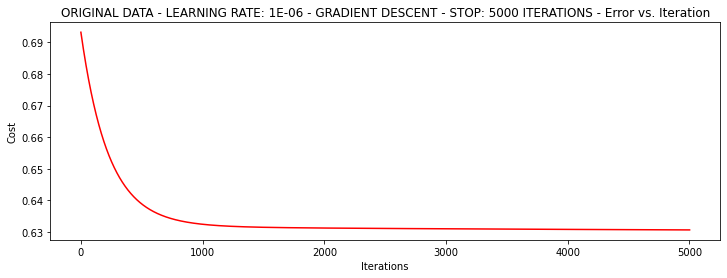

In [11]:
n= 100
runExpe(orig_data,theta,n,STOP_ITER,thresh=5000,alpha=0.000001)
plt.show()

***Original data - learning rate: 0.001 - Gradient descent - Stop: gradient norm < 0.05
Theta: [[-2.37033409  0.02721692  0.01899456]] - Iter: 40045 - Last cost: 0.49 - Duration: 3.55s


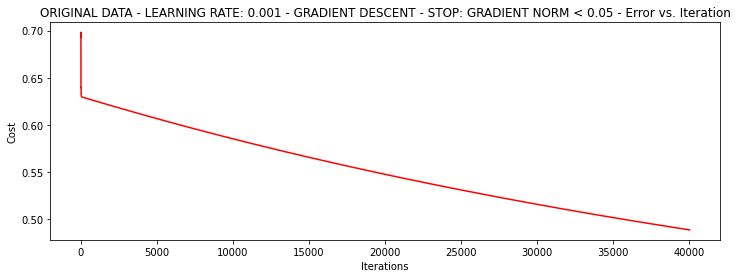

In [12]:
runExpe(orig_data,theta,n,STOP_GRAD,thresh=0.05,alpha=0.001)
plt.show()

***Original data - learning rate: 0.001 - Gradient descent - Stop: costs change < 1e-06
Theta: [[-5.13364014  0.04771429  0.04072397]] - Iter: 109901 - Last cost: 0.38 - Duration: 9.53s


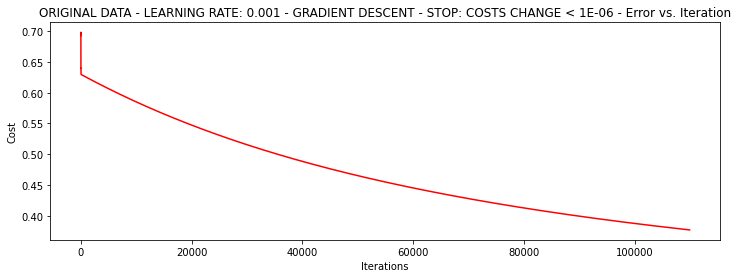

In [13]:
runExpe(orig_data,theta,n,STOP_COST,thresh=0.000001,alpha=0.001)
plt.show()

## SGD 和 mini-batch SGD 对比

***Original data - learning rate: 0.001 - Stochastic descent - Stop: 5000 iterations
Theta: [[-0.38313113  0.11951407 -0.03955383]] - Iter: 5000 - Last cost: 1.54 - Duration: 0.14s


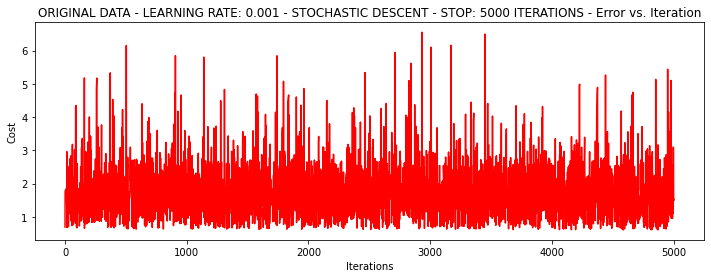

In [14]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=5000, alpha=0.001)
plt.show()

***Original data - learning rate: 2e-06 - Stochastic descent - Stop: 15000 iterations
Theta: [[-0.00202289  0.00994005  0.00081118]] - Iter: 15000 - Last cost: 0.63 - Duration: 0.40s


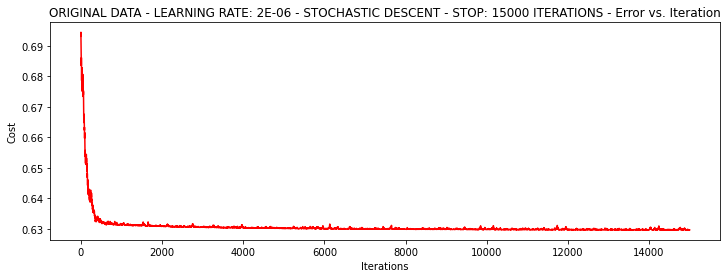

In [15]:
runExpe(orig_data, theta, 1, STOP_ITER, thresh=15000, alpha=0.000002)
plt.show()

***Original data - learning rate: 0.001 - Mini-batch (16) descent - Stop: 15000 iterations
Theta: [[-1.0393464   0.0065097   0.01006584]] - Iter: 15000 - Last cost: 0.61 - Duration: 0.53s


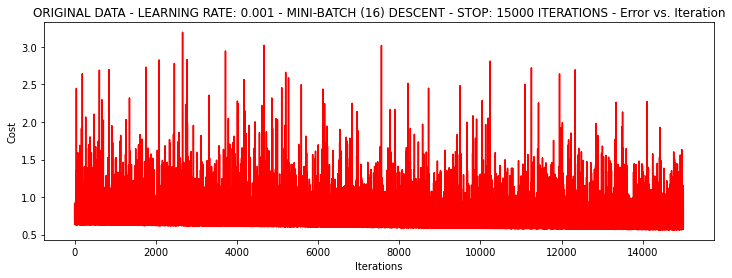

In [16]:
runExpe(orig_data, theta, 16, STOP_ITER, thresh=15000, alpha=0.001)
plt.show()

## 对数据进行标准化

***Scaled data - learning rate: 0.001 - Gradient descent - Stop: 5000 iterations
Theta: [[0.3080807  0.86494967 0.77367651]] - Iter: 5000 - Last cost: 0.38 - Duration: 0.45s


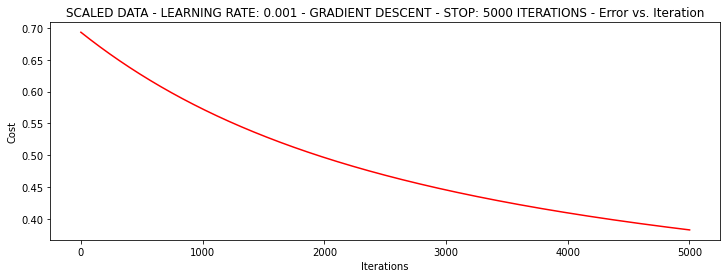

In [17]:
##对数据进行标准化 将数据按其属性(按列进行)减去其均值，然后除以其方差。
#最后得到的结果是，对每个属性/每列来说所有数据都聚集在0附近，方差值为1
 
from sklearn import preprocessing as pp
 
scaled_data = orig_data.copy()
scaled_data[:, 1:3] = pp.scale(orig_data[:, 1:3])

runExpe(scaled_data, theta, n, STOP_ITER, thresh=5000, alpha=0.001)
plt.show()

## 二分类任务设置判别阈值

In [18]:
#设定阈值
def predict(X, theta):
    return [1 if x >= 0.5 else 0 for x in model(X, theta)]

In [19]:
scaled_X = scaled_data[:, :3]
y = scaled_data[:, 3]
predictions = predict(scaled_X, theta)
correct = [1 if ((a == 1 and b == 1) or (a == 0 and b == 0)) else 0 for (a, b) in zip(predictions, y)]
accuracy = (sum(map(int, correct)) % len(correct))
print ('accuracy = {0}%'.format(accuracy))

accuracy = 60%
